In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the data
data_path = '/content/drive/MyDrive/ML/A8/titanic_train.csv'
df = pd.read_csv(data_path)

In [4]:
# 3.	Drop the features “ Name, Ticket and Cabin”.
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [6]:
# Convert Categorical Features into Integers
# Convert categorical feature 'Sex' into integers
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert categorical feature 'Embarked' into integers
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Display the modified dataframe to verify the changes
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


In [11]:
# Fill missing values for numerical columns with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Fill missing values for categorical columns with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Verify if there are any remaining missing values
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [12]:
# Splitting data
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Apply Decision Tree Classifier and Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
# Instantiate and fit the Decision Tree classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# Instantiate and fit the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Get predictions for Decision Tree
y_pred_dtree = dtree.predict(X_test)

In [18]:
# Get predictions for Random Forest
y_pred_rf = rf.predict(X_test)

In [24]:
# Get feature importances from Decision Tree
feature_importances_dtree = pd.DataFrame(
    dtree.feature_importances_,
    index=X.columns,
    columns=['Feature Importance']
)
print(feature_importances_dtree)

             Feature Importance
PassengerId            0.225722
Pclass                 0.101525
Sex                    0.293493
Age                    0.114241
SibSp                  0.040500
Parch                  0.009574
Fare                   0.199156
Embarked               0.015790


In [19]:
# Calculate metrics for Decision Tree
conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
precision_dtree = precision_score(y_test, y_pred_dtree)
recall_dtree = recall_score(y_test, y_pred_dtree)
f1_dtree = f1_score(y_test, y_pred_dtree)

In [20]:
# Calculate metrics for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

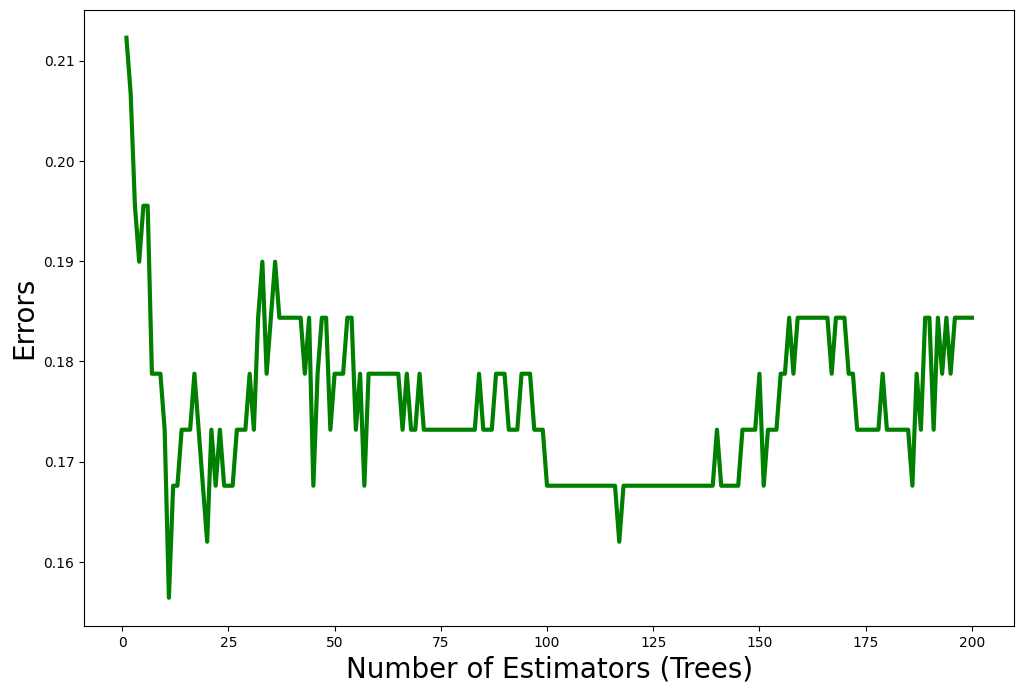

In [23]:
# Plotting Errors Vs Number of Estimators
errors = []
for i in range(1, 201):
    rf = RandomForestClassifier(n_estimators=i, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

plt.figure(figsize=(12, 8))
plt.plot(range(1, 201), errors, 'g', lw=3)
plt.xlabel('Number of Estimators (Trees)', fontsize=20)
plt.ylabel('Errors', fontsize=20)
plt.show()

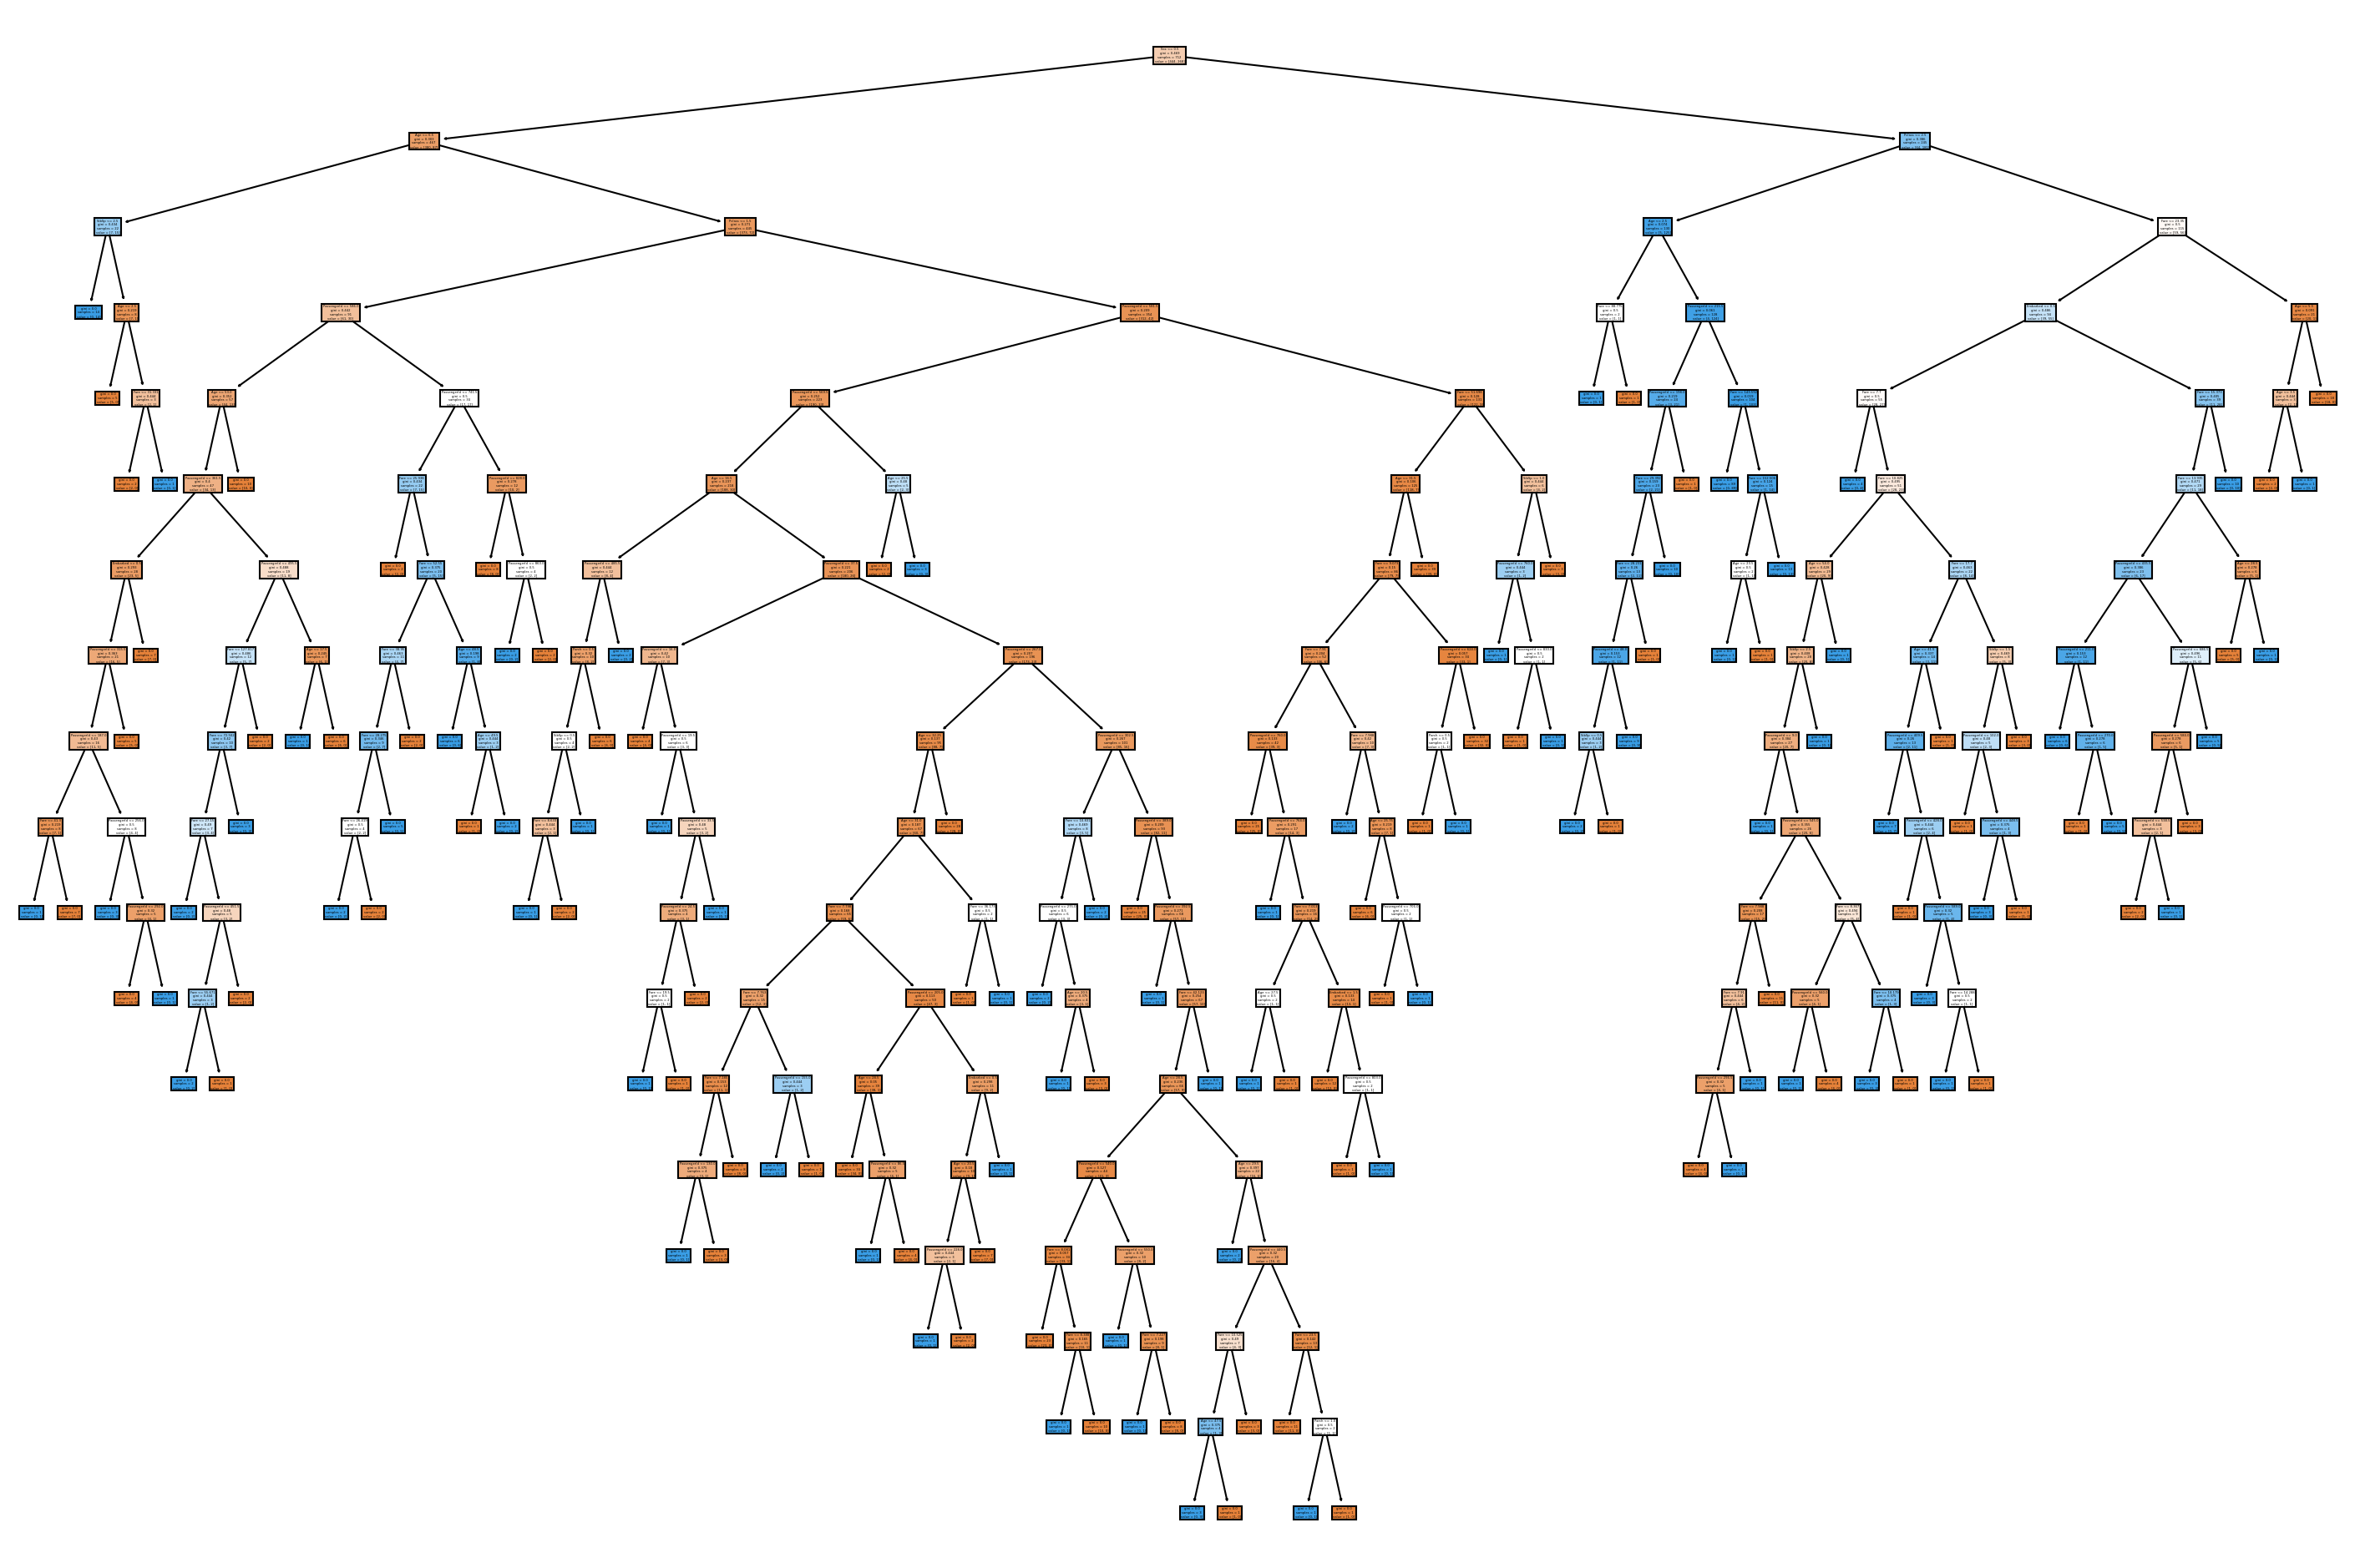

In [22]:
# Visualize the decision tree
plt.figure(figsize=(24,16), dpi=150)
plot_tree(dtree, filled=True, feature_names=X.columns)
plt.show()

In [21]:
# Print the results
print("Decision Tree Classifier Metrics:")
print("Confusion Matrix:\n", conf_matrix_dtree)
print("Accuracy:", accuracy_dtree)
print("Precision:", precision_dtree)
print("Recall:", recall_dtree)
print("F1-Score:", f1_dtree)

print("\nRandom Forest Classifier Metrics:")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)


Decision Tree Classifier Metrics:
Confusion Matrix:
 [[83 22]
 [24 50]]
Accuracy: 0.7430167597765364
Precision: 0.6944444444444444
Recall: 0.6756756756756757
F1-Score: 0.684931506849315

Random Forest Classifier Metrics:
Confusion Matrix:
 [[93 12]
 [18 56]]
Accuracy: 0.8324022346368715
Precision: 0.8235294117647058
Recall: 0.7567567567567568
F1-Score: 0.7887323943661971
